In [ ]:
# DGMD-14 Final Project 
# Determining Ballet Moves using Machine Learning
# GROUP NAME: The Eastenders
# NAMES: Ana Nystedt, Allyson Bieryla, Devesh Bhor

In [89]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Text(0, 0.5, 'Acceleration')

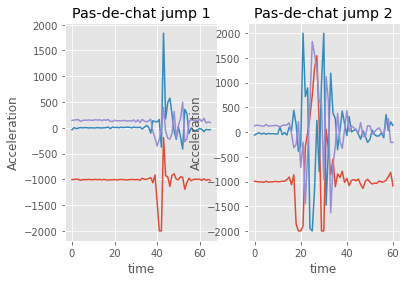

In [57]:
# EXAMPLE multiplot for Acceleration

plt.subplot(121)            # 1 row, 2 cols, chart 1
plt.plot(df1.Accel_X)
plt.plot(df1.Accel_Y)
plt.plot(df1.Accel_Z)
plt.title("Pas-de-chat jump 1")     # sets the title for the chart
plt.xlabel("time")   # sets the label to use for the x-axis
plt.ylabel("Acceleration")      # sets the label to use for the y-axis
plt.subplot(122)            # 1 row, 2 cols, chart 2
plt.plot(df2.Accel_X)
plt.plot(df2.Accel_Y)
plt.plot(df2.Accel_Z)
plt.title("Pas-de-chat jump 2")     # sets the title for the chart
plt.xlabel("time")   # sets the label to use for the x-axis
plt.ylabel("Acceleration")      # sets the label to use for the y-axis


In [177]:
# THIS IS WILL CLEAN DATA FROM PHONE 
# Import CSV data from phone 

# DIRECTORY OF CSV FILES GLISSADE ACCEL
dir_name = 'PROJECT/data/glissade/Accel'
# make list of CSV files
list_of_csvs = [x for x in os.listdir(dir_name) if x.endswith('.csv')]

# stats.csv -> stats
fns = [os.path.splitext(os.path.basename(x))[0] for x in list_of_csvs]

# Create a dictionary of dataframes
d_GA = {}  # dictionary that will hold them 

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(fns)):
        #print (i)
        #print (list_of_csvs[i])
        csvfile = os.path.join(dir_name, list_of_csvs[i])
        #print (csvfile)
        d_GA[i] = pd.read_csv(csvfile, skiprows=4, usecols=[3,5,6,7])
        d_GA[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']
        
#print (d[0])


# DIRECTORY OF CSV FILES GLISSADE GYRO
dir_name = 'PROJECT/data/glissade/Gyro'
# make list of CSV files
list_of_csvs = [x for x in os.listdir(dir_name) if x.endswith('.csv')]

# stats.csv -> stats
fns = [os.path.splitext(os.path.basename(x))[0] for x in list_of_csvs]

# Create a dictionary of dataframes
d_GG = {}  # dictionary that will hold them 

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(fns)):
        csvfile = os.path.join(dir_name, list_of_csvs[i])
        d_GG[i] = pd.read_csv(csvfile, skiprows=4, usecols=[3,5,6,7])
        d_GG[i].columns = ['Time', 'Gyro_X', 'Gyro_Y', 'Gyro_Z']
        
        

# NOW work on PAS-DE-CHAT data

# DIRECTORY OF CSV FILES PAS-DE-CHAT ACCEL
dir_name = 'PROJECT/data/pas-de-chat/Accel'
# make list of CSV files
list_of_csvs = [x for x in os.listdir(dir_name) if x.endswith('.csv')]

# stats.csv -> stats
fns = [os.path.splitext(os.path.basename(x))[0] for x in list_of_csvs]

# Create a dictionary of dataframes
d_PA = {}  # dictionary that will hold them 

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(fns)):
        #print (i)
        #print (list_of_csvs[i])
        csvfile = os.path.join(dir_name, list_of_csvs[i])
        #print (csvfile)
        d_PA[i] = pd.read_csv(csvfile, skiprows=4, usecols=[3,5,6,7])
        d_PA[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']
        
#print (d[0])


# DIRECTORY OF CSV FILES GLISSADE GYRO
dir_name = 'PROJECT/data/pas-de-chat/Gyro'
# make list of CSV files
list_of_csvs = [x for x in os.listdir(dir_name) if x.endswith('.csv')]

# stats.csv -> stats
fns = [os.path.splitext(os.path.basename(x))[0] for x in list_of_csvs]

# Create a dictionary of dataframes
d_PG = {}  # dictionary that will hold them 

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(fns)):
        csvfile = os.path.join(dir_name, list_of_csvs[i])
        d_PG[i] = pd.read_csv(csvfile, skiprows=4, usecols=[3,5,6,7])
        d_PG[i].columns = ['Time', 'Gyro_X', 'Gyro_Y', 'Gyro_Z']


In [ ]:
## PLOT THE  GLISSADE DATA

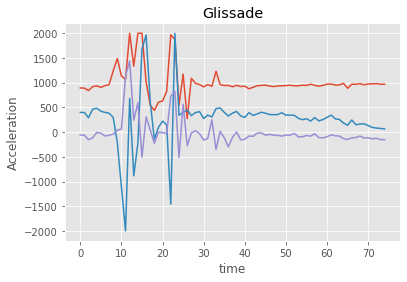

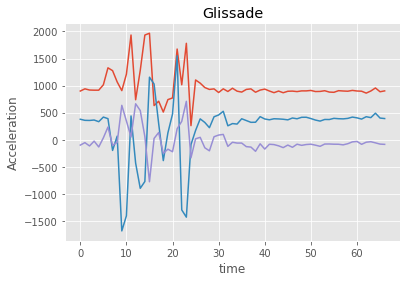

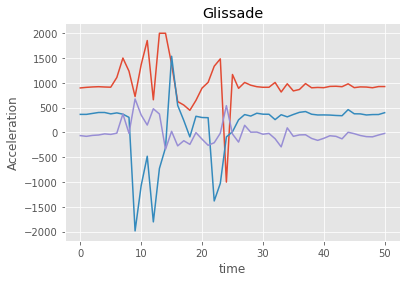

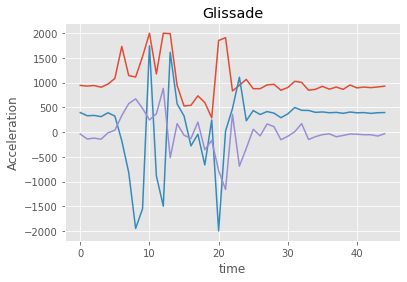

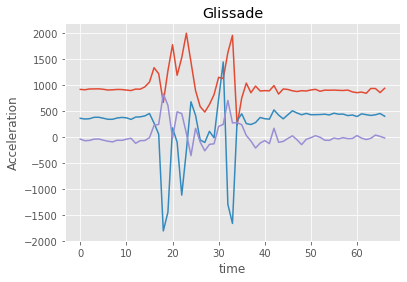

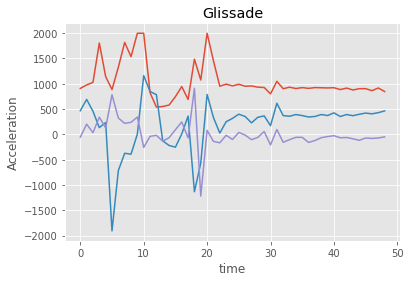

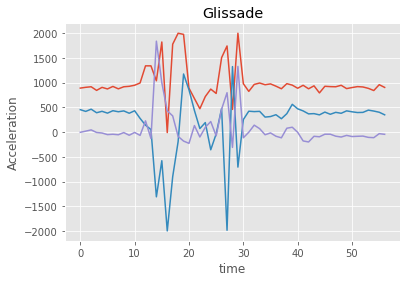

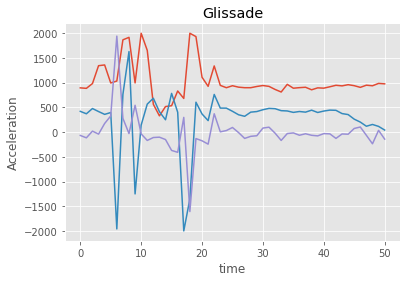

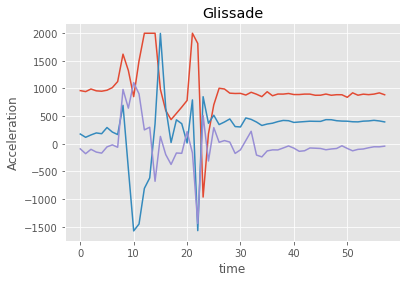

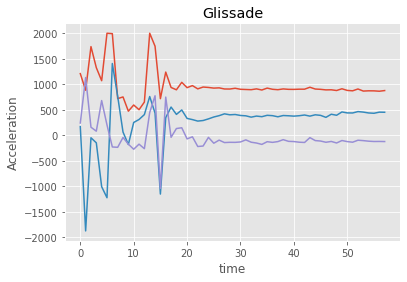

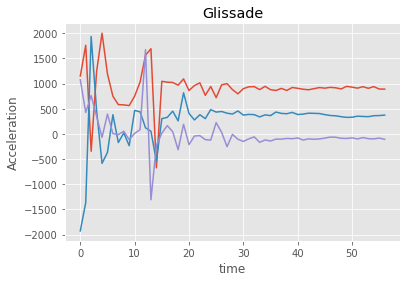

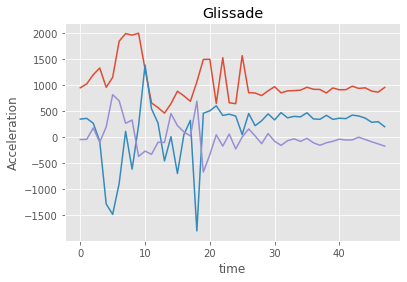

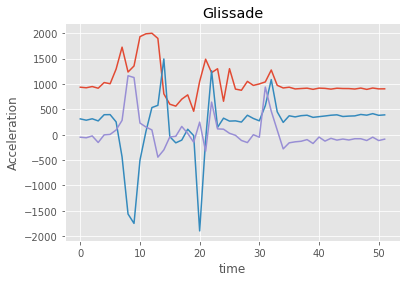

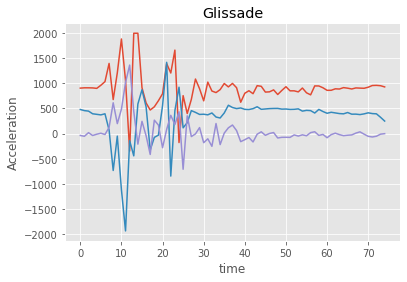

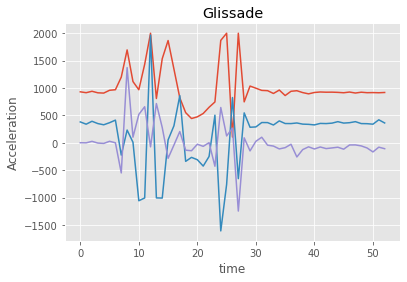

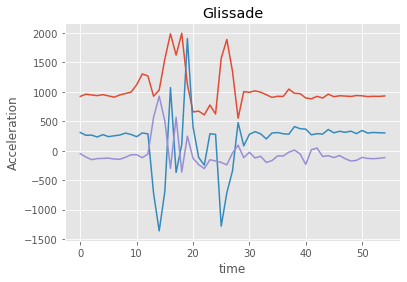

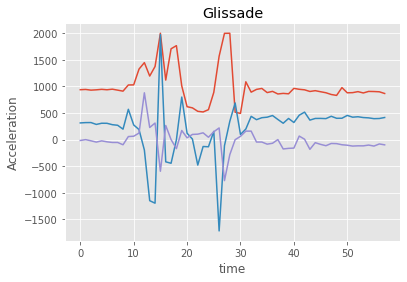

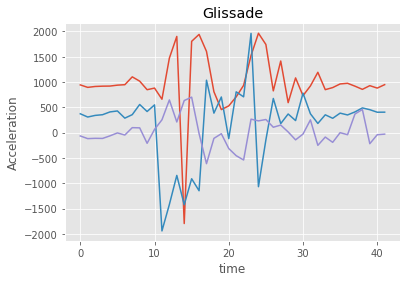

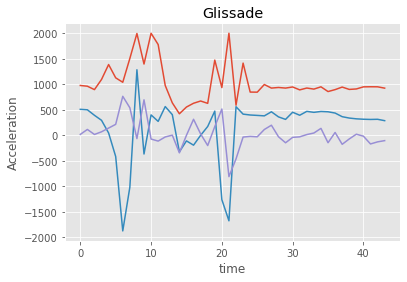

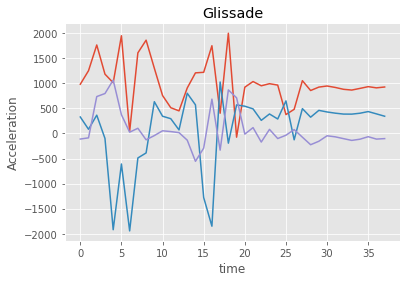

In [175]:
# make PLOTS for  Accel data to visualize (GLISSADE)
from matplotlib import style
style.use("ggplot")


for i in range(len(fns)):
    plt.figure()
    plt.plot(d_GA[i].Accel_X)
    plt.plot(d_GA[i].Accel_Y)
    plt.plot(d_GA[i].Accel_Z)
    plt.title("Glissade")     # sets the title for the chart
    plt.xlabel("time")   # sets the label to use for the x-axis
    plt.ylabel("Acceleration")      # sets the label to use for the y-axis
    
plt.show()

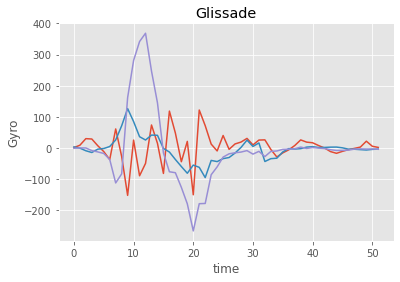

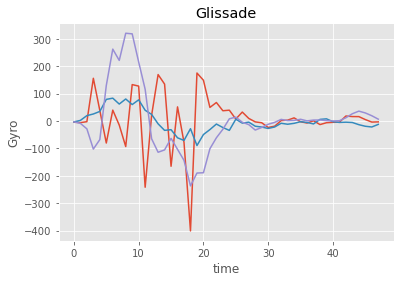

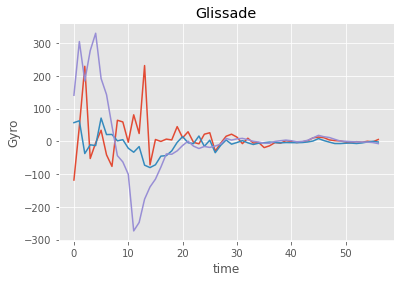

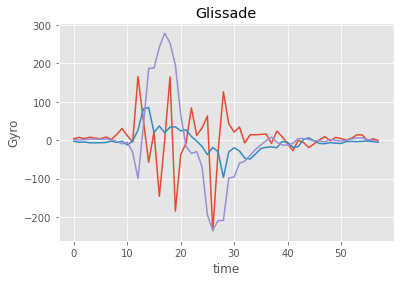

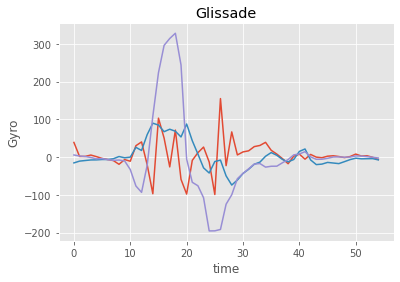

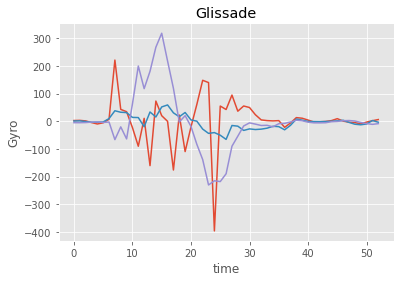

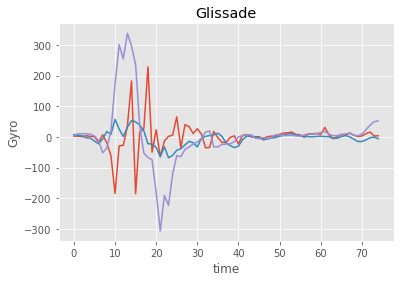

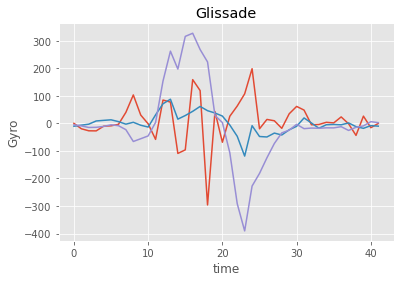

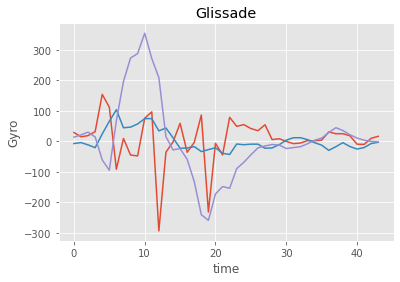

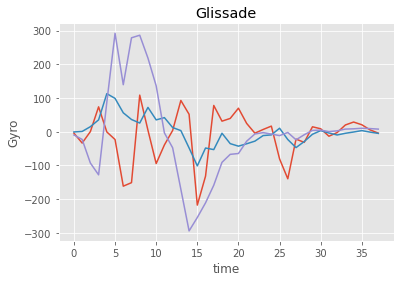

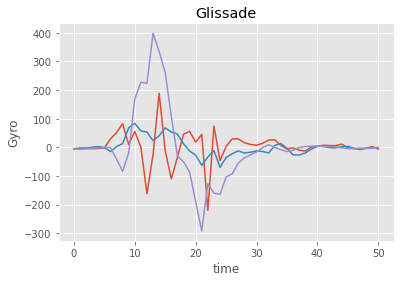

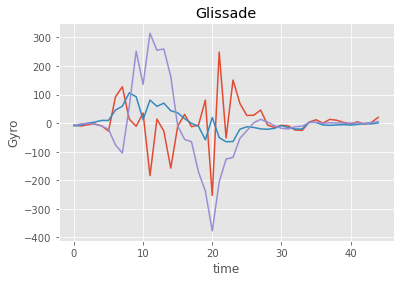

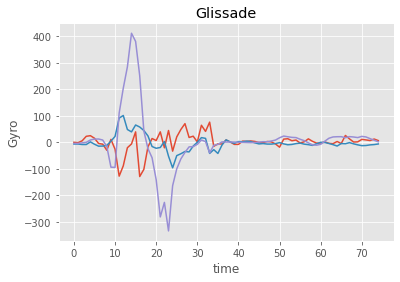

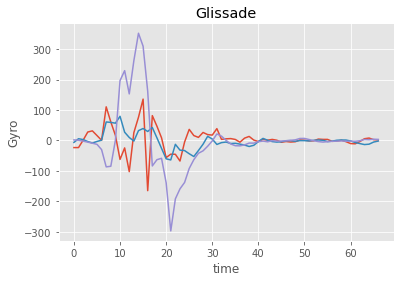

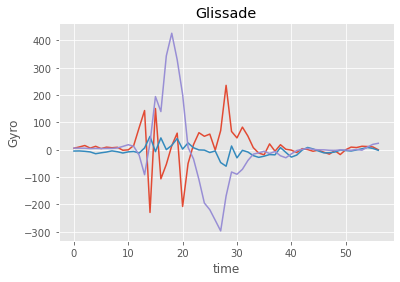

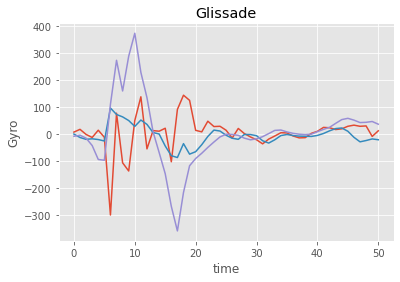

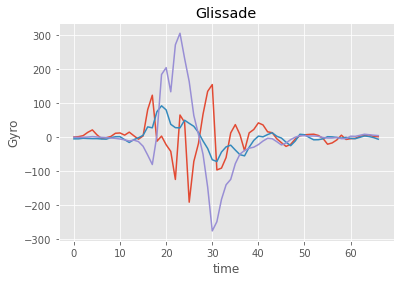

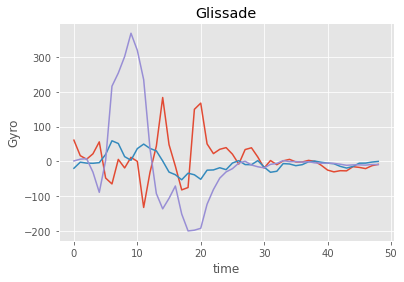

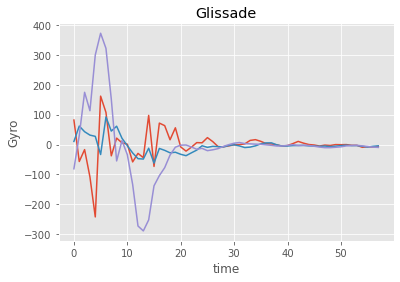

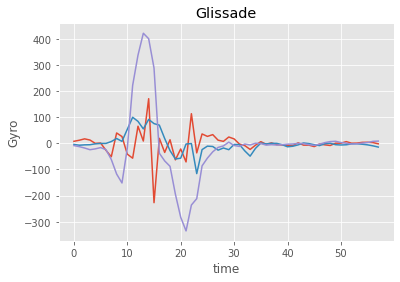

In [173]:
# make PLOTS for Gyro data to visualize (GLISSADE)
for i in range(len(fns)):
    plt.figure()
    plt.plot(d_GG[i].Gyro_X)
    plt.plot(d_GG[i].Gyro_Y)
    plt.plot(d_GG[i].Gyro_Z)
    plt.title("Glissade")     # sets the title for the chart
    plt.xlabel("time")   # sets the label to use for the x-axis
    plt.ylabel("Gyro")      # sets the label to use for the y-axis
    
plt.show()

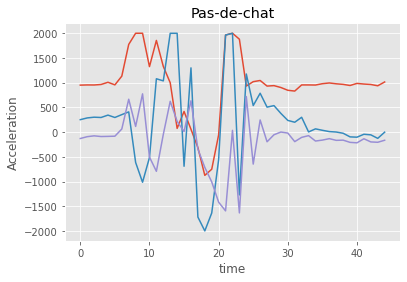

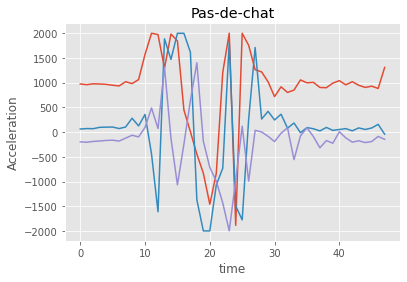

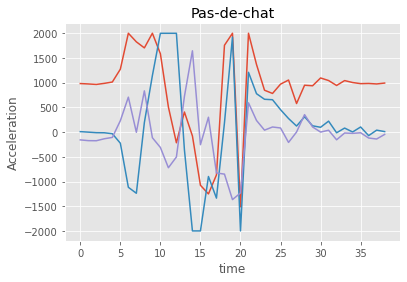

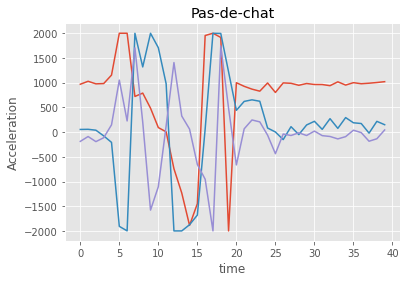

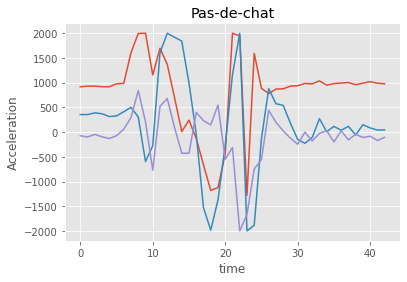

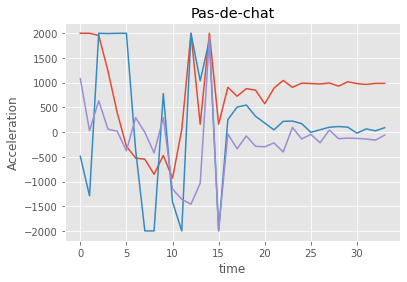

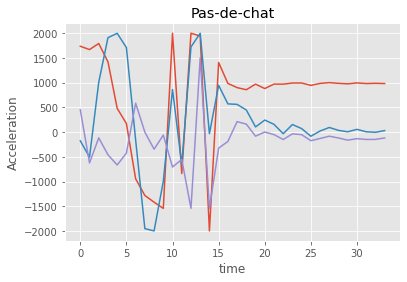

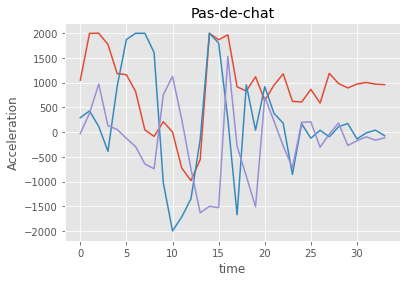

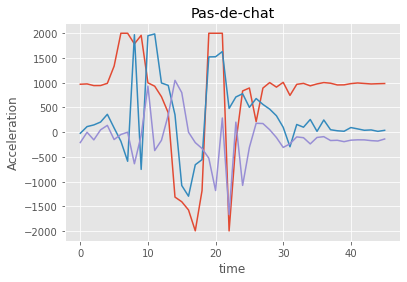

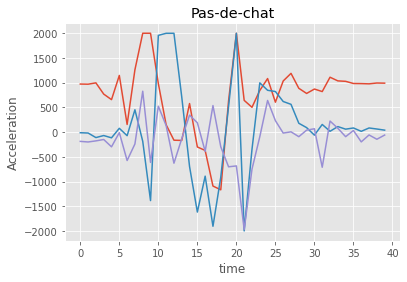

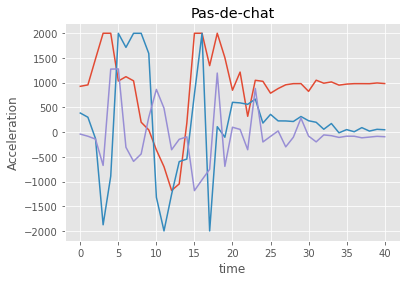

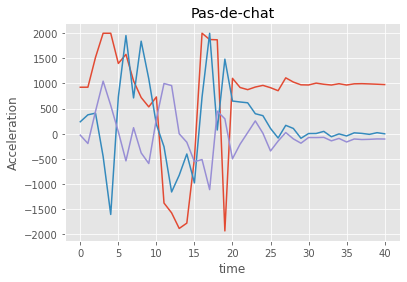

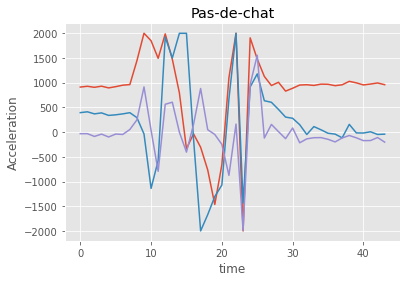

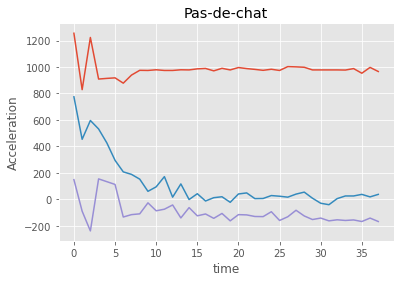

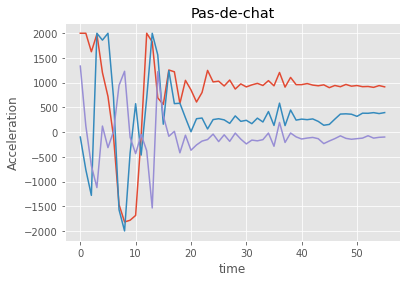

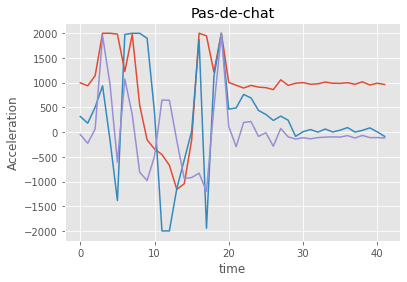

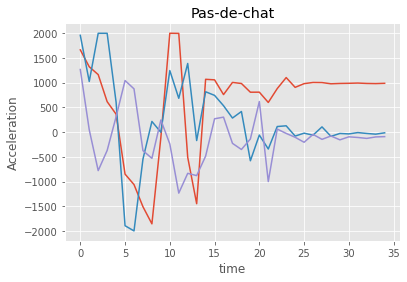

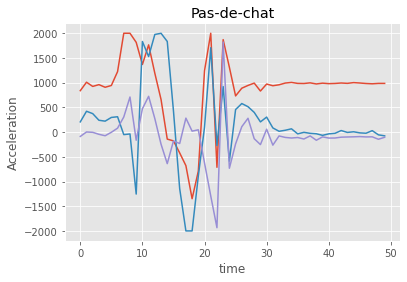

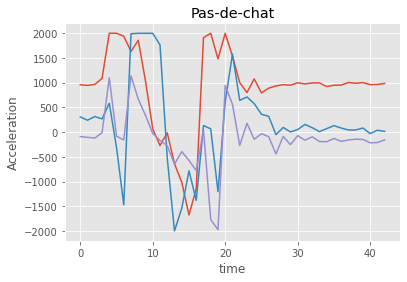

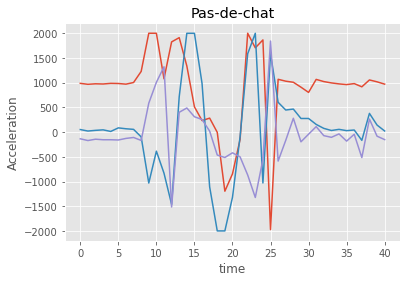

In [178]:
# make PLOTS for Accel data to visualize (PAS-DE-CHAT)


for i in range(len(fns)):
    plt.figure()
    plt.plot(d_PA[i].Accel_X)
    plt.plot(d_PA[i].Accel_Y)
    plt.plot(d_PA[i].Accel_Z)
    plt.title("Pas-de-chat")     # sets the title for the chart
    plt.xlabel("time")   # sets the label to use for the x-axis
    plt.ylabel("Acceleration")      # sets the label to use for the y-axis
    
plt.show()

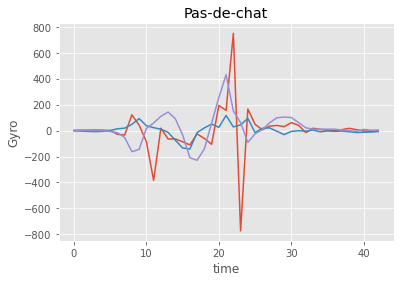

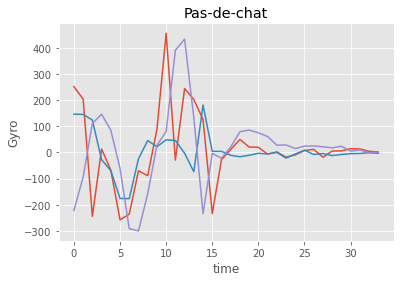

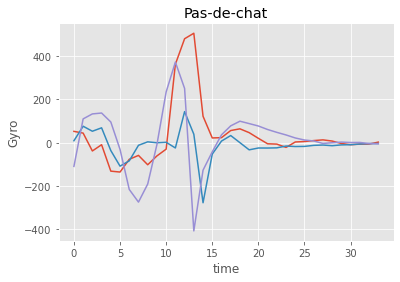

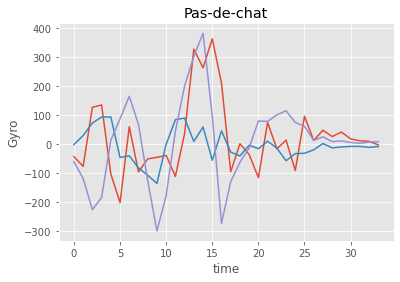

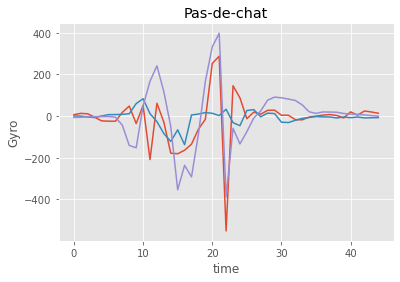

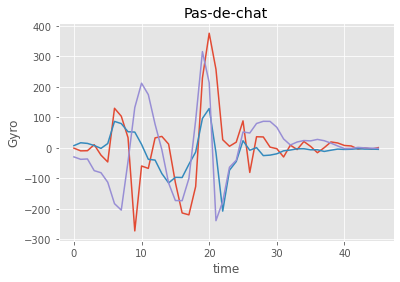

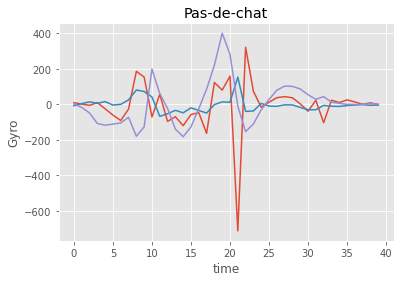

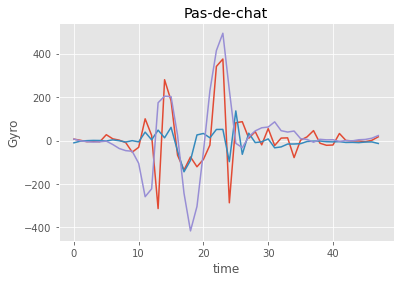

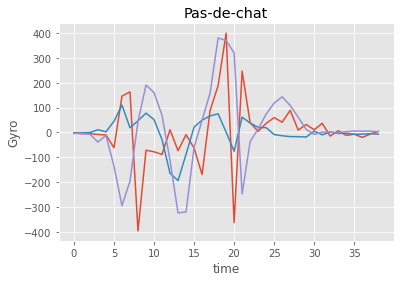

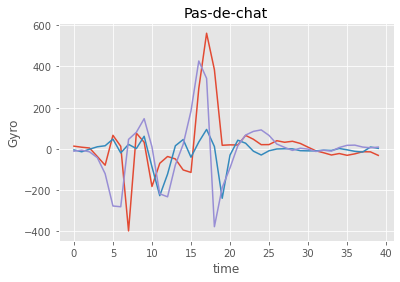

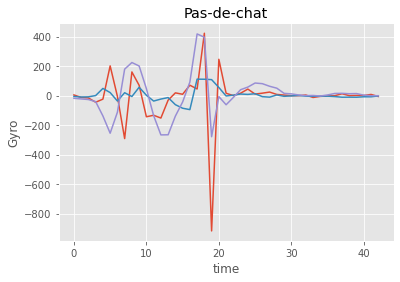

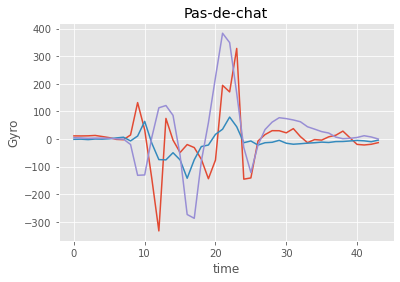

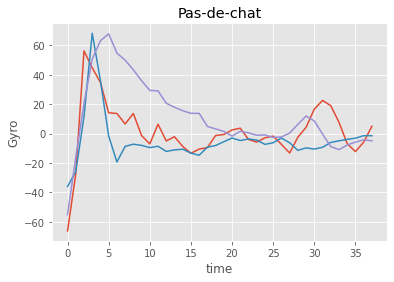

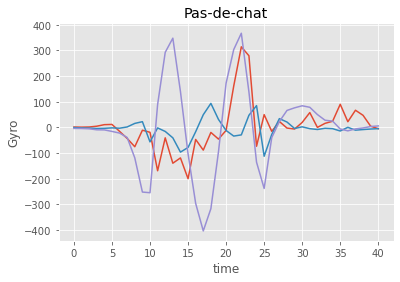

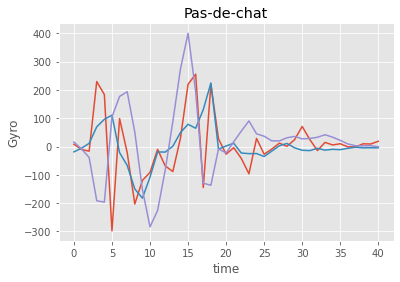

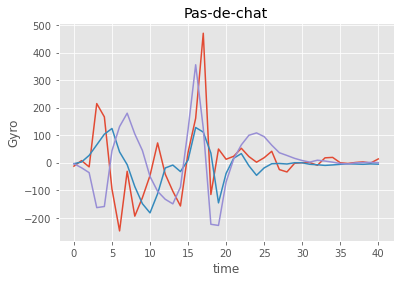

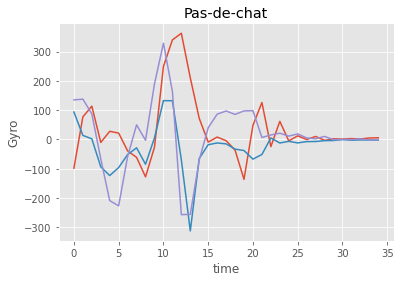

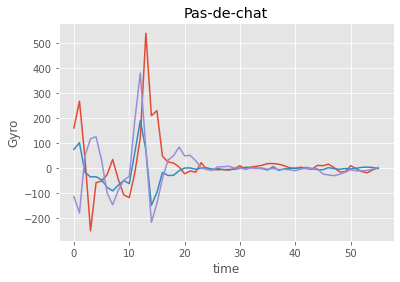

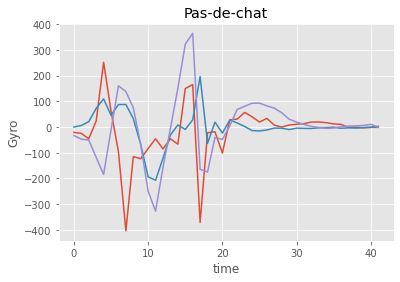

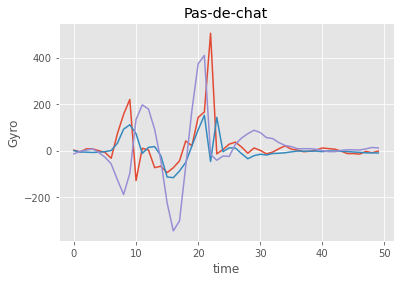

In [179]:
# make PLOTS for Gyro data to visualize (PAS-DE-CHAT)
for i in range(len(fns)):
    plt.figure()
    plt.plot(d_PG[i].Gyro_X)
    plt.plot(d_PG[i].Gyro_Y)
    plt.plot(d_PG[i].Gyro_Z)
    plt.title("Pas-de-chat")     # sets the title for the chart
    plt.xlabel("time")   # sets the label to use for the x-axis
    plt.ylabel("Gyro")      # sets the label to use for the y-axis
    
plt.show()